# Norms, Cosine Similarity and Linear Correlation
<hr>
This notebook introduces the concept of vector and matrix norms. We will begin by demonstrating how to compute various types of vector and matrix norms. Next, we'll apply the concept of norms to define cosine similarity and explore its applications. Additionally, we'll illustrate the relationship between norms and cosine similarity in addressing linear correlation problems. We will implement linear correlation and provide multiple examples.

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Vector and Matrix Norms

### Vector Norms
A function $\lVert \cdot \rVert: \mathbb{R}^n \to \mathbb{R}$ is a vector norm if: 
* $\lVert x \rVert \geq 0 $ and $\lVert x \rVert = 0 \iff x = 0$
* $\lVert \alpha x \rVert =  \vert \alpha \vert \lVert x \rVert, \alpha \in \mathbb{R}$
* $\lVert x + y \rVert \leq \lVert x \rVert \lVert y \rVert $
An additional property which could be derived is:
* $\vert \lVert x \rVert - \lVert y \rVert \vert \leq \lVert x - y \rVert$
The most used norms are the **p-norms**
$ \lVert x \rVert_{p}  = \left[\sum_{i=1}^{n} \vert x_i \vert ^p \right]^{1/p} $

In [2]:
# Create a vector
x = np.array([2, -5, 3, 1, -8, 10, 11])
print("Vector x: {}".format(x))

Vector x: [ 2 -5  3  1 -8 10 11]


#### Norm 1 (Manhattan distance)
The formulation for the Norm 1 is $ \lVert x \rVert_{1}  = \sum_{i=1}^{n} \vert x_i \vert$

In [3]:
# Compute the norm 1
norm1_x = np.linalg.norm(x,1)
print("Norm 1 of vector x: {}".format(norm1_x))

Norm 1 of vector x: 40.0


#### Norm 2 (Euclidian norm)
The formulation for the Norm 2 is $ \lVert x \rVert_{2}  = \sqrt[2]{\sum_{i=1}^{n} \vert x_i \vert ^2}$

In [4]:
# Compute the norm 2 (Default value for np.linalg.norm is 2, in case of vector)
norm2_x = np.linalg.norm(x)
print("Norm 2 of vector x: {}".format(norm2_x))

Norm 2 of vector x: 18.0


#### Norm infinity
The formulation for the Norm infinity is $ \lim_{p \to \infty} \lVert x \rVert_{p} = \lVert x \rVert_{\infty}  = \max_{1 \leq i \leq n} \vert x_i \vert$

In [5]:
# Compute the norm infinity
norm_inf_x = np.linalg.norm(x, np.inf)
print("Norm infinity of vector x: {}".format(norm_inf_x))

Norm infinity of vector x: 11.0


### Matrix Norms
A function $\lVert \cdot \rVert$ is a matrix norm if: 
* $\lVert A \rVert \geq 0 $ and $\lVert A \rVert = 0 \iff A = 0$
* $\lVert \alpha A \rVert =  \vert \alpha \vert \lVert A \rVert, \forall \alpha \in \mathbb{R}$
* $\lVert A + B \rVert \leq \lVert A \rVert + \lVert B \rVert \forall A,B \in \mathbb{R}^{m \times n}$
* $\lVert AB \rVert \leq \lVert A \rVert \lVert B \rVert \forall A \in \mathbb{R}^{m \times p}, \forall B \in \mathbb{R}^{p \times n}$

In [6]:
# Create a matrix
A = np.array([[-10, -2], [1, -1], [5, 3]])
print("Matrix A:\n{}".format(A))

Matrix A:
[[-10  -2]
 [  1  -1]
 [  5   3]]


#### Matrix Norm induced by Norm 1
The formulation for the Matrix Norm 1 is $ \lVert A \rVert_{1}  = \max_{\lVert x \rVert_{1} = 1} \lVert Ax \rVert_{1} =  \max_{j} \sum_{i}^{} \vert a_{ij} \vert$

In [7]:
# Compute the norm 1
norm1_A = np.linalg.norm(A, 1)
print("Norm 1 of matrix A: {}".format(norm1_A))

Norm 1 of matrix A: 16.0


#### Matrix Norm induced by Norm 2
The formulation for the Matrix Norm 2 is $ \lVert A \rVert_{2} = \max_{\sqrt{x^Tx} = 1} \sqrt{x^TA^TAx}$

In [8]:
# Compute the norm 2
norm2_A = np.linalg.norm(A, 2)
print("Norm 2 of matrix A: {}".format(norm2_A))

Norm 2 of matrix A: 11.641020462856197


#### Matrix Norm induced by Inf-Norm
The formulation for the Matrix Inf-Norm is $ \lVert A \rVert_{\infty} = \max_{\lVert x \rVert_{\infty} = 1} \lVert Ax \rVert_{\infty} =  \max_{i} \sum_{j}^{} \vert a_{ij} \vert$

In [9]:
# Compute the norm infinity
norm_inf_A = np.linalg.norm(A, np.inf)
print("Norm infinity of matrix A: {}".format(norm_inf_A))

Norm infinity of matrix A: 12.0


#### Frobenius Norm
The formulation for the Frobenius Norm is $ \lVert A \rVert_{F} = \sqrt{ \sum_{i,j}^{} \vert a_{ij}\vert^2}= \sqrt{trace(A^TA)}$

In [10]:
# Compute the frobenius norm (Default value for np.linalg.norm is fro, in case of matrix)
norm_frob_A = np.linalg.norm(A)
print("Frobenius Norm of matrix A: {}".format(norm_frob_A))

Frobenius Norm of matrix A: 11.832159566199232


## Cosine similarity
Cosine similarity is a measure of similarity between two non-zero vectors defined in an inner product space. Cosine similarity is the cosine of the angle between the vectors; that is, it is the dot product of the vectors divided by the product of their lengths. It follows that the cosine similarity does not depend on the magnitudes of the vectors, but only on their angle. <br>
Given two vectors $a = \begin{pmatrix} a_1\\ a_2 \\...\\ a_n \end{pmatrix} $ and $b = \begin{pmatrix} b_1\\ b_2\\...\\b_n \end{pmatrix} $ the angle between the two vectors $a$ and $b$ is defined as follow : $ \cos \vartheta = \frac{b^Ta}{\lVert b \rVert \lVert a \rVert}$

### Function to compute the cosine similarity
**NB**: In python there is no difference between row and column vectors; thus, in the function definition we don't need to transpose **b**.
* INPUT
  * **a**: Input vector a
  * **b**: Input vector b
* OUTPUT
  * **theta**: The cosine similarity between the two input vectors **a** and **b**



In [11]:
def cosine_similarity(w,y):
    return np.dot(y, w) / (np.linalg.norm(y) * np.linalg.norm(w))

In [12]:
a = np.array([5, 7])
print("Vector a: {}".format(a))

b = np.array([4, 3])
print("Vector b: {}".format(b))

Vector a: [5 7]
Vector b: [4 3]


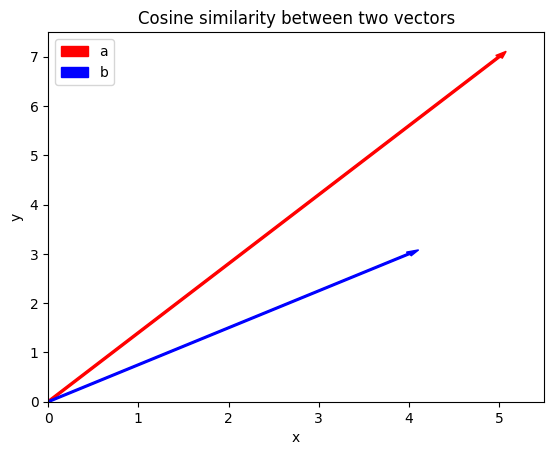

In [13]:
# plot the two vector
plt.arrow(0,0,a[0],a[1], color='r', capstyle="projecting", width=0.03)
plt.arrow(0,0,b[0],b[1], color='b', capstyle="projecting", width=0.03)
plt.xlim([0, 5.5])
plt.ylim([0, 7.5])
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['a','b'])
plt.title('Cosine similarity between two vectors')
plt.show()

In [14]:
# compute the cosine similarity
print("The cosine similarity between a and b is: {}".format(cosine_similarity(a,b)))

The cosine similarity between a and b is: 0.953230637699318


## Linear Correlation